In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math

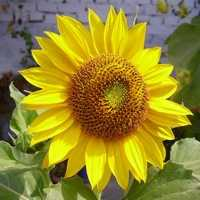

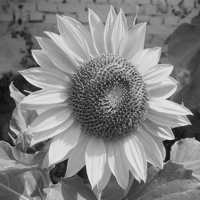

(200, 200, 3)
(200, 200)


In [ ]:
img = cv2.imread("/content/tint1.jpg")


img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img)
cv2_imshow(img1)

print(img.shape)
print(img1.shape)

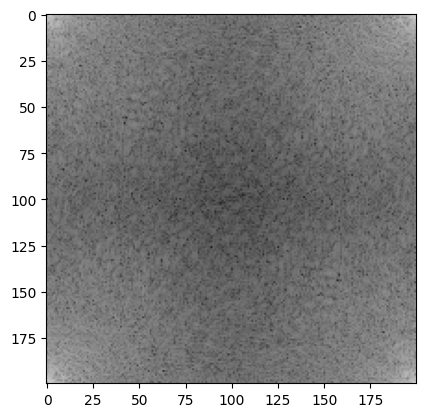

In [ ]:
F = np.fft.fft2(img1)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')

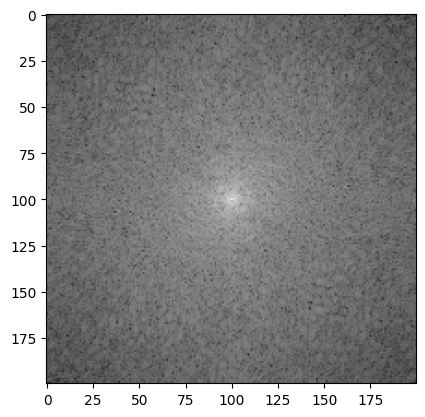

In [ ]:
Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)), 
           cmap='gray')

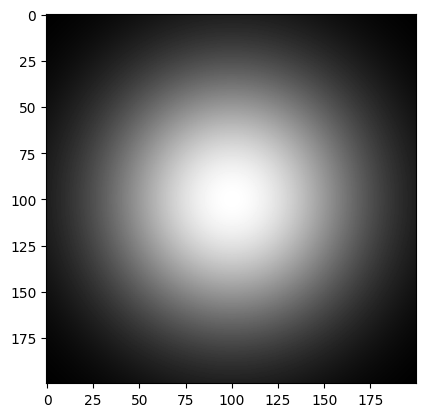

In [ ]:
M,N = img1.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = (math.exp(-(D**2)/(2*(D0**2))))
            
plt.imshow(H,cmap='gray')

Low Pass Filtering

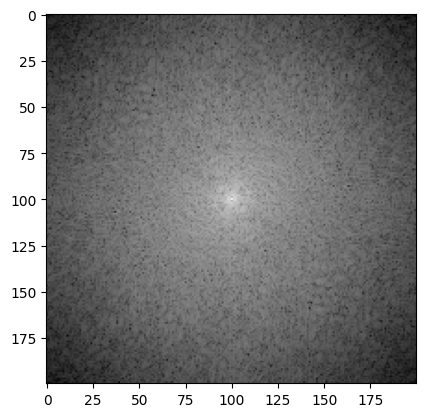

In [ ]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')

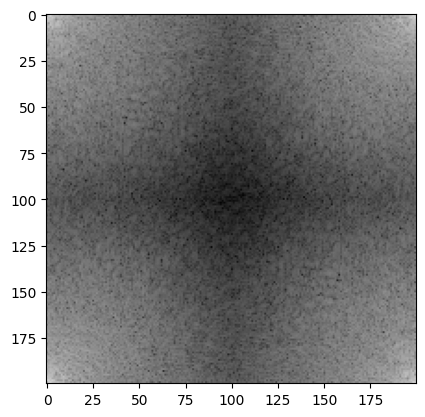

In [ ]:
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')

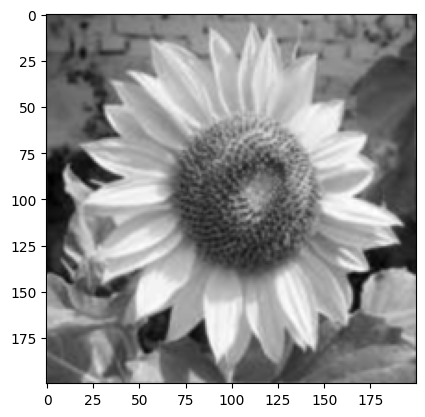

In [ ]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')

High pass Filtering

In [ ]:
HP = 1 - H

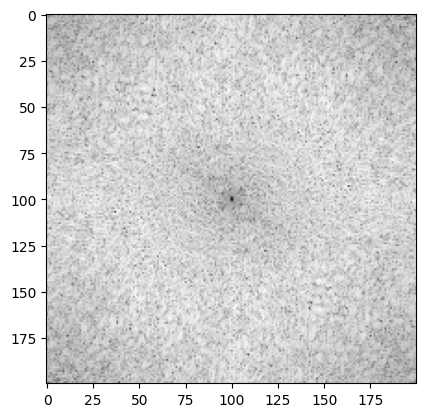

In [ ]:
Gshift1 = Fshift * HP
plt.imshow(np.log1p(np.abs(Gshift1)), 
           cmap='gray')

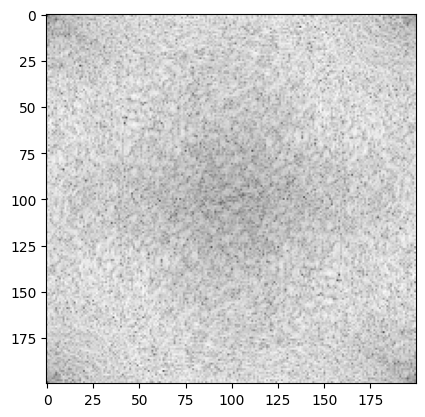

In [ ]:
G1 = np.fft.ifftshift(Gshift1)
plt.imshow(np.log1p(np.abs(G1)), 
           cmap='gray')

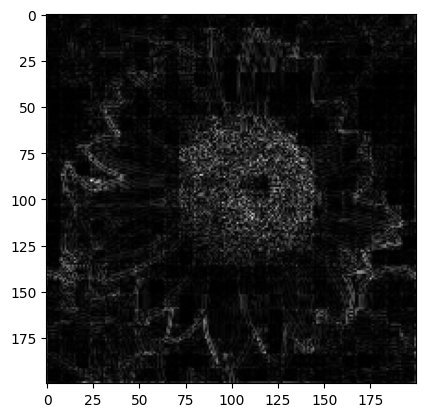

In [ ]:
g1 = np.abs(np.fft.ifft2(G1))
plt.imshow(g1, cmap='gray')